In [20]:
from glob import glob
import pandas as pd
import numpy as np
import requests

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score,roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.utils.class_weight import compute_sample_weight

import matplotlib.pyplot as plt
import geopandas as gpd

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [22]:
full = pd.read_csv('full.csv')
full.head()

,bin,roofarea,svf,numbldgs,assesstot,bldgarea,comarea,yearbuilt_1900_1940,yearbuilt_1940_1980,yearbuilt_1980_2000,...,pctUnder18,pctOver62,solar,approved_0_1_block,approved_1_2_block,approved_2_5_block,alter1,alter2,popdensity,noise
0,3000002.0,17683.475106,0.769877,1.0,17318250.0,170493.0,163894.0,0,0,0,...,20.1,3.2,0,0,0,0,1,1,0.000835,1.459135
1,3413929.0,9431.126565,0.548905,1.0,12383114.0,102534.0,4686.0,0,0,0,...,20.1,3.2,0,0,0,0,0,0,0.000835,1.639049
2,3000007.0,8192.772710,0.730845,1.0,371250.0,9585.0,9585.0,0,0,1,...,20.1,3.2,0,0,0,0,0,0,0.000835,0.032885
3,3000010.0,43459.105586,0.729904,1.0,30760650.0,500000.0,500000.0,1,0,0,...,20.1,3.2,0,0,0,0,1,0,0.000835,0.061532
4,3000011.0,19246.260335,0.827548,1.0,1474200.0,21735.0,21735.0,0,1,0,...,20.1,3.2,0,0,0,0,1,0,0.000835,0.116876


In [23]:
features = full.columns.difference(['solar','bin','noise'])
features

Index(['alter1', 'alter2', 'approved_0_1_block', 'approved_1_2_block',
       'approved_2_5_block', 'assesstot', 'bldgarea', 'comarea', 'landuse_2.0',
       'landuse_3.0', 'landuse_4.0', 'landuse_5.0', 'landuse_6.0',
       'landuse_7.0', 'landuse_8.0', 'medianIncome', 'numbldgs',
       'pctAfricanAmerican', 'pctAsian', 'pctBachelors', 'pctLatino',
       'pctOver62', 'pctUnder18', 'pctWhite', 'popdensity', 'roofarea', 'svf',
       'yearbuilt_1900_1940', 'yearbuilt_1940_1980', 'yearbuilt_1980_2000',
       'yearbuilt_2000_2010', 'yearbuilt_2010_2015', 'yearbuilt_2015_2020'],
      dtype='object')

In [24]:
X = full[features]
y = full['solar']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state=0)


In [25]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(class_weight="balanced",loss="hinge", random_state=42)),
])

In [52]:
# Cs = [0.00001]
Cs = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

In [53]:
# svm_clf.fit(X_train, y_train)

In [54]:
param_grid = {
    'linear_svc__C': Cs
}

In [55]:
svm_grid = GridSearchCV(svm_clf, param_grid, cv=3, scoring='roc_auc', verbose=2)
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................................linear_svc__C=1e-06; total time=   0.5s
[CV] END ................................linear_svc__C=1e-06; total time=   0.4s
[CV] END ................................linear_svc__C=1e-06; total time=   0.5s
[CV] END ................................linear_svc__C=1e-05; total time=   0.5s
[CV] END ................................linear_svc__C=1e-05; total time=   0.5s
[CV] END ................................linear_svc__C=1e-05; total time=   0.6s
[CV] END ...............................linear_svc__C=0.0001; total time=   0.8s
[CV] END ...............................linear_svc__C=0.0001; total time=   0.6s
[CV] END ...............................linear_svc__C=0.0001; total time=   0.8s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................linear_svc__C=0.001; total time=   1.1s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................linear_svc__C=0.001; total time=   1.0s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................linear_svc__C=0.001; total time=   1.0s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END .................................linear_svc__C=0.01; total time=   3.4s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END .................................linear_svc__C=0.01; total time=   3.2s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END .................................linear_svc__C=0.01; total time=   3.7s


/Users/tylermatteo/.pyenv/versions/3.7.10/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svc',
                                        LinearSVC(class_weight='balanced',
                                                  loss='hinge',
                                                  random_state=42))]),
             param_grid={'linear_svc__C': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             scoring='roc_auc', verbose=2)

In [56]:
svm_grid.best_params_

{'linear_svc__C': 0.01}

In [57]:
svm_clf_best = svm_grid.best_estimator_

In [58]:
y_pred = svm_clf_best.predict(X_test)

In [59]:
from matplotlib import pyplot as plt


In [60]:
def binary_classification_performance(y_test, y_pred, weights=None):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred, sample_weight=weights).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result


In [62]:
res = binary_classification_performance(y_test, y_pred)

In [63]:
res

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.67,0.04,0.72,0.08,0.69,0.04,0.72,43574,965,22034,371


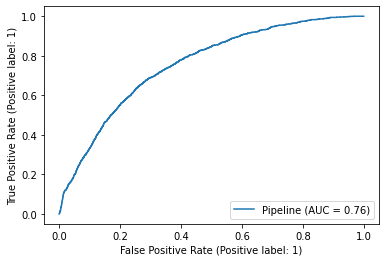

In [64]:
plot_roc_curve(svm_clf_best, X_test, y_test)

In [24]:
svm_clf_best.named_steps['linear_svc'].coef_

array([[ 1.91839869e-13, -4.03678431e-13, -1.02537761e+00,
         3.55321550e-13,  1.23936392e-13, -7.11430009e-11,
         9.46685568e-12,  5.97161104e-12, -8.67324936e-13,
        -1.63667741e-12, -3.76101927e-13,  2.18179924e-13,
        -5.70352714e-13, -1.50051218e-14,  1.78212534e-13,
         4.77160969e-13, -4.08723901e-13,  3.23114434e-13,
         2.39728923e-13, -3.82003087e-13, -4.87389774e-13,
         6.88654924e-13,  3.50013976e-13,  4.82555266e-13,
         8.40305120e-13,  3.15565930e-13,  1.16238143e-12,
        -1.77061068e-13, -2.05591709e-13, -2.27853834e-14,
        -5.22833085e-13,  1.28976046e-13,  1.89775640e-13,
         1.93281798e-14]])

In [47]:
X_train_preprocessed = pd.DataFrame(
    svm_clf_best.named_steps['scaler'].transform(X_train),
    columns=features
)

In [48]:
coefs = pd.DataFrame(
    svm_clf_best.named_steps['linear_svc'].coef_[0]*
    X_train_preprocessed.std(axis=0),
    columns=['Coefficient importance'],
    index=features
)

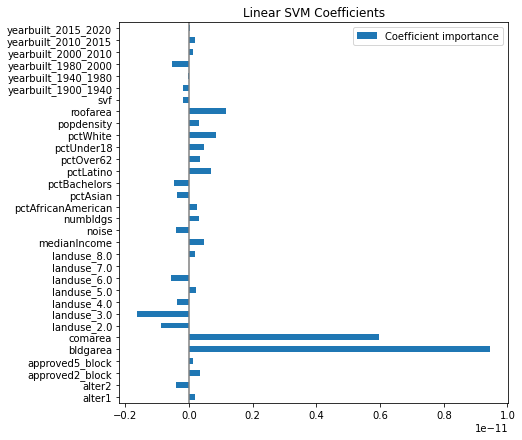

In [64]:
coefs.drop(['approved1_block','assesstot']).plot(kind='barh', figsize=(9, 7))
plt.title('Linear SVM Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

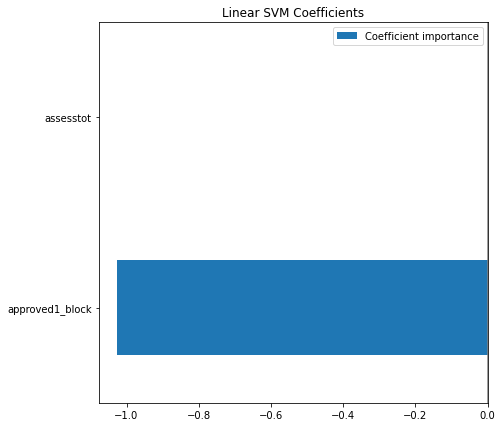

In [57]:
coefs.loc[['approved1_block','assesstot']].plot(kind='barh', figsize=(9, 7))
plt.title('Linear SVM Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [51]:
coefs

,Coefficient importance
alter1,1.918403e-13
alter2,-4.036794e-13
approved1_block,-1.025380e+00
approved2_block,3.553224e-13
approved5_block,1.239367e-13
assesstot,-7.114318e-11
bldgarea,9.466879e-12
comarea,5.971626e-12
landuse_2.0,-8.673271e-13
landuse_3.0,-1.636681e-12


In [53]:
X_train_preprocessed

,alter1,alter2,approved1_block,approved2_block,approved5_block,assesstot,bldgarea,comarea,landuse_2.0,landuse_3.0,...,pctWhite,popdensity,roofarea,svf,yearbuilt_1900_1940,yearbuilt_1940_1980,yearbuilt_1980_2000,yearbuilt_2000_2010,yearbuilt_2010_2015,yearbuilt_2015_2020
0,-0.349346,-0.124574,3.568487,3.119766,1.368045,-0.067092,-0.201604,-0.088133,-0.554628,-0.107492,...,-1.581775,-1.086273,-0.339324,0.181927,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
1,-0.349346,-0.124574,-0.332515,-0.478927,-0.581540,-0.058776,-0.178882,-0.088133,1.803009,-0.107492,...,0.224897,0.397529,-0.350489,-1.217046,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
2,-0.349346,-0.124574,-0.332515,-0.478927,0.068322,-0.039533,-0.148587,-0.088133,-0.554628,-0.107492,...,1.374901,-1.019724,-0.135078,0.858284,-1.531379,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
3,-0.349346,-0.124574,-0.332515,-0.478927,0.068322,-0.061110,-0.158295,-0.088133,-0.554628,-0.107492,...,-0.728439,-0.584754,-0.141912,0.867108,-1.531379,2.711192,-0.184640,-0.188186,-0.080811,-0.078629
4,2.862494,-0.124574,-0.332515,-0.478927,-0.581540,0.585445,2.907628,-0.088133,-0.554628,9.303021,...,-0.758439,3.112564,1.744350,0.478404,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200826,-0.349346,-0.124574,-0.332515,-0.478927,-0.581540,-0.053639,-0.138397,-0.088133,-0.554628,-0.107492,...,0.801566,0.276540,-0.151566,-0.229084,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
200827,-0.349346,-0.124574,-0.332515,0.720637,0.718184,-0.066814,-0.202017,-0.088133,-0.554628,-0.107492,...,-1.288441,0.683317,-0.101195,-0.564763,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
200828,2.862494,-0.124574,-0.332515,-0.478927,-0.581540,0.372727,3.941239,-0.088133,-0.554628,9.303021,...,-0.661772,5.279774,2.179954,0.518449,0.653006,-0.368841,-0.184640,-0.188186,-0.080811,-0.078629
200829,2.862494,8.027364,-0.332515,-0.478927,-0.581540,0.032219,-0.196371,0.024468,-0.554628,-0.107492,...,0.341564,-0.203014,0.228809,0.799307,-1.531379,2.711192,-0.184640,-0.188186,-0.080811,-0.078629
